In [ ]:
%pip install mediapipe
%pip install opencv-python
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install scikit-learn
%pip install seaborn

In [2]:
import mediapipe as mp
import csv
import cv2
import numpy as np

class_name = "Happy"

cap = cv2.VideoCapture(0)

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)

        # Recolor back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.face_landmarks,
                mp_holistic.FACEMESH_CONTOURS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
            )

        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.right_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
            )

        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.left_hand_landmarks,
                mp_holistic.HAND_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
            )

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(
                image,
                results.pose_landmarks,
                mp_holistic.POSE_CONNECTIONS,
                landmark_drawing_spec=mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                connection_drawing_spec=mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
            )

        # Export Co-ordinates
        try:
            if results.pose_landmarks and results.face_landmarks:
                # Extract pose landmarks
                pose = results.pose_landmarks.landmark
                pose_row = [np.array([lmk.x, lmk.y, lmk.z, lmk.visibility]) for lmk in pose]
                pose_row = np.array(pose_row).flatten()

                # Extract face landmarks
                face = results.face_landmarks.landmark
                face_row = [np.array([lmk.x, lmk.y, lmk.z, lmk.visibility]) for lmk in face]
                face_row = np.array(face_row).flatten()

                # Combine
                row = np.concatenate([pose_row, face_row])
                row = row.tolist()  # Convert to list for mixed data types

                # Insert class label at the start
                row.insert(0, class_name)

                # Write to CSV
                with open('Dataset/coords.csv', mode='a', newline='') as f:
                    csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                    csv_writer.writerow(row)

                print(f"Recorded data for class: {class_name}")

            else:
                if not results.pose_landmarks:
                    print("Pose landmarks missing this frame.")
                if not results.face_landmarks:
                    print("Face landmarks missing this frame.")

        except Exception as e:
            print(f"Exception during landmark extraction: {e}")

        # Display
        cv2.imshow('Raw Webcam Feed', image)

        # Quit on pressing 'q'
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [Errno 2] No such file or directory: 'Dataset/coords.csv'
Exception during landmark extraction: [E

In [3]:
import mediapipe as mp
import csv
import cv2
import numpy as np

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face = mp.solutions.face_mesh



class_name="Sad"

cap = cv2.VideoCapture(0)
# Initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)

        # face_landmarks, pose_landmarks, left_hand_landmarks, right_hand_landmarks

        # Recolor image back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face.FACEMESH_TESSELATION,
                                   mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                                   mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))

        # 2. Right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2))

        # 3. Left Hand
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2))

        # 4. Pose Detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
                                   mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2))

        # 5. Export Co-ordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())    

            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())    

            # Concate rows
            row = pose_row + face_row

            # Append class name
            row.insert(0, class_name)

            # Export to CSV
            with open('Dataset/coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)

        except:
            pass

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [4]:
import mediapipe as mp
import csv
import cv2
import numpy as np

class_name = "Victorious"

mp_face_mesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)

        # Recolor back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # Draw face, hands, pose landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)

        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

        # 5. Export Co-ordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())    

            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in face]).flatten())    

            # Combine into single row
            row = pose_row + face_row

            # Prepend class label
            row.insert(0, class_name)

            # Save to CSV
            with open('Dataset/coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)
            
            print(f"Recorded data for class: {class_name}")

        except Exception:
            pass

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


In [5]:
import mediapipe as mp
import csv
import cv2
import numpy as np

class_name = "Fight"

mp_face_mesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)

        # Recolor back to BGR for rendering
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks
        if results.face_landmarks:
            mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)

        # 2. Right hand
        if results.right_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # 3. Left hand
        if results.left_hand_landmarks:
            mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # 4. Pose
        if results.pose_landmarks:
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)

        # 5. Export Co-ordinates
        try:
            # Extract Pose landmarks
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())    

            # Extract Face landmarks
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())    

            # Combine into single row
            row = pose_row + face_row

            # Prepend class label
            row.insert(0, class_name)

            # Save to CSV
            with open('Dataset/coords.csv', mode='a', newline='') as f:
                csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
                csv_writer.writerow(row)

        except Exception:
            pass

        # Display
        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


Head of dataset:
   class  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  Happy   0.493696   0.476837  -0.680558   0.999999   0.527318   0.415455   
1  Happy   0.493420   0.476707  -0.732752   0.999997   0.526658   0.415614   
2  Happy   0.490573   0.477660  -0.895725   0.999963   0.523835   0.417054   
3  Happy   0.488572   0.478190  -0.842731   0.999942   0.522235   0.417742   
4  Happy   0.485720   0.481732  -0.819882   0.999876   0.519929   0.421500   

   feature_7  feature_8  feature_9  ...  feature_1995  feature_1996  \
0  -0.621346   0.999998   0.545978  ...     -0.009786           0.0   
1  -0.654018   0.999997   0.544832  ...     -0.009445           0.0   
2  -0.807326   0.999966   0.542215  ...     -0.008995           0.0   
3  -0.754900   0.999954   0.540706  ...     -0.008105           0.0   
4  -0.742296   0.999894   0.539183  ...     -0.008595           0.0   

   feature_1997  feature_1998  feature_1999  feature_2000  feature_2001  \
0      0.543

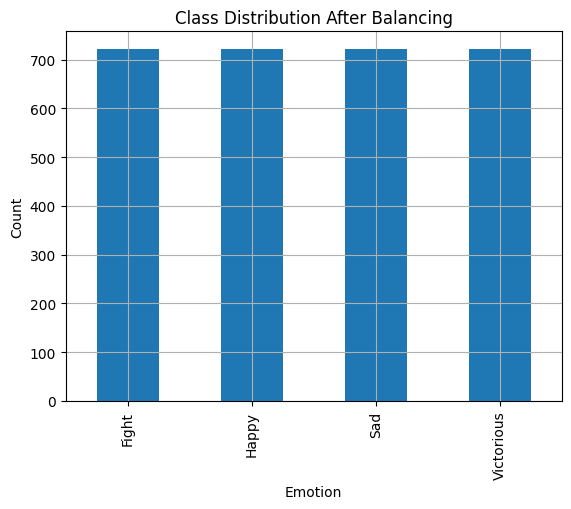

Accuracy lr 0.9948096885813149
Confusion Matrix lr [[150   0   2   0]
 [  0 128   1   0]
 [  0   0 144   0]
 [  0   0   0 153]]
Classification Report lr               precision    recall  f1-score   support

       Fight       1.00      0.99      0.99       152
       Happy       1.00      0.99      1.00       129
         Sad       0.98      1.00      0.99       144
  Victorious       1.00      1.00      1.00       153

    accuracy                           0.99       578
   macro avg       0.99      0.99      0.99       578
weighted avg       0.99      0.99      0.99       578

F1 Score lr 0.994821619162072
Accuracy rc 0.9930795847750865
Confusion Matrix rc [[149   0   3   0]
 [  0 128   1   0]
 [  0   0 144   0]
 [  0   0   0 153]]
Classification Report rc               precision    recall  f1-score   support

       Fight       1.00      0.98      0.99       152
       Happy       1.00      0.99      1.00       129
         Sad       0.97      1.00      0.99       144
  Victorious

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  # Correct import
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
# Load dataset
df = pd.read_csv("../Dataset/coords.csv", header=None)

# Assign column names
# Assuming first column is class label and rest are features
df.columns = ['class'] + [f'feature_{i}' for i in range(1, df.shape[1])]

# Display first few rows
print("Head of dataset:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

# Show original class distribution
print("\nOriginal class distribution:")
print(df['class'].value_counts())

# Balance the dataset (undersample to smallest class count)
min_count = df['class'].value_counts().min()
balanced_df = df.groupby('class').apply(lambda x: x.sample(min_count)).reset_index(drop=True)

# Show balanced class distribution
print("\nBalanced class distribution:")
print(balanced_df['class'].value_counts())

# Separate features and target
X = balanced_df.drop('class', axis=1)
y = balanced_df['class']

# Plot class distribution
y.value_counts().plot(kind='bar', title='Class Distribution After Balancing')
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

#Model Building
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.impute import SimpleImputer

pipelines={
    'lr':make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),LogisticRegression(max_iter=1000)),
    'rc':make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),RidgeClassifier()),
    'rf':make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),RandomForestClassifier()),
    'gb':make_pipeline(SimpleImputer(strategy='mean'),StandardScaler(),GradientBoostingClassifier()),
}

fit_models={}
for algo,pipeline in pipelines.items():
    model=pipeline.fit(X_train,y_train)
    fit_models[algo]=model

#ModelDeployment

from sklearn.metrics import accuracy_score,f1_score
import pickle

for algo,model in fit_models.items():
    yhat=model.predict(X_test)
    print("Accuracy", algo,accuracy_score(y_test,yhat))
    print("Confusion Matrix",algo,confusion_matrix(y_test,yhat))
    print("Classification Report",algo,classification_report(y_test,yhat))
    print("F1 Score",algo,f1_score(y_test,yhat,average='weighted'))


import os
# Ensure directory exists
os.makedirs('Model', exist_ok=True)
# Save the model
with open('Model/body_language.pkl', 'wb') as f:
    pickle.dump(fit_models['lr'], f)
with open('Model/body_language.pkl', 'rb') as f:
    model=pickle.load(f)
print(type(model))


import mediapipe as mp
import csv
import cv2
import numpy as np
import pandas as pd

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh


cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Recolor Feed
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False

        # Make Detections
        results = holistic.process(image)

        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 1. Draw face landmarks
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )

        # 2. Right hand
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )

        # 3. Left hand
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )

        # 4. Pose Detections
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )

        # Export coordinates and predictions
        try:
            pose = results.pose_landmarks.landmark
            pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose]).flatten())
            face = results.face_landmarks.landmark
            face_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in face]).flatten())

            row = pose_row + face_row
            X = pd.DataFrame([row], columns=X_train.columns)

            body_language_class = model.predict(X)[0]
            body_language_prob = model.predict_proba(X)[0]

            print(body_language_class, body_language_prob)

            coords = tuple(np.multiply(
                np.array((
                    results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].x,
                    results.pose_landmarks.landmark[mp_holistic.PoseLandmark.LEFT_EAR].y)),
                [640, 480]).astype(int))

            cv2.rectangle(image,
                          (coords[0], coords[1] + 5),
                          (coords[0] + len(body_language_class) * 20, coords[1] - 30),
                          (245, 117, 16), -1)

            cv2.putText(image, body_language_class, coords,
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Status box
            cv2.rectangle(image, (0, 0), (250, 60), (245, 117, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS', (95, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, body_language_class.split(' ')[0], (98, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Display Probability
            cv2.putText(image, 'PROB', (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(body_language_prob[np.argmax(body_language_prob)], 2)), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        except Exception as e:
            print(f"Error: {e}")

        cv2.imshow('Raw Webcam Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


In [7]:
print("Head of dataset:")
print(df.head())
print(f"\n[{df.head().shape[0]} rows x {df.shape[1]} columns]\n")

# Show the last 5 rows
print("Last 5 rows:")
print(df.tail())
print(f"\n[{df.tail().shape[0]} rows x {df.shape[1]} columns]")

Head of dataset:
   class  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  Happy   0.493696   0.476837  -0.680558   0.999999   0.527318   0.415455   
1  Happy   0.493420   0.476707  -0.732752   0.999997   0.526658   0.415614   
2  Happy   0.490573   0.477660  -0.895725   0.999963   0.523835   0.417054   
3  Happy   0.488572   0.478190  -0.842731   0.999942   0.522235   0.417742   
4  Happy   0.485720   0.481732  -0.819882   0.999876   0.519929   0.421500   

   feature_7  feature_8  feature_9  ...  feature_1995  feature_1996  \
0  -0.621346   0.999998   0.545978  ...     -0.009786           0.0   
1  -0.654018   0.999997   0.544832  ...     -0.009445           0.0   
2  -0.807326   0.999966   0.542215  ...     -0.008995           0.0   
3  -0.754900   0.999954   0.540706  ...     -0.008105           0.0   
4  -0.742296   0.999894   0.539183  ...     -0.008595           0.0   

   feature_1997  feature_1998  feature_1999  feature_2000  feature_2001  \
0      0.543

In [8]:
print(df.describe())

         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  3226.000000  3226.000000  3226.000000  3226.000000  3226.000000   
mean      0.435502     0.496982    -1.008206     0.997421     0.463787   
std       0.109385     0.086254     0.454258     0.013868     0.109560   
min       0.051370     0.180952    -4.045749     0.798043     0.075967   
25%       0.418647     0.472643    -1.239758     0.999507     0.446695   
50%       0.460013     0.510819    -0.913277     0.999787     0.487272   
75%       0.499896     0.540621    -0.695670     0.999973     0.530268   
max       0.857435     1.071680    -0.144325     0.999999     0.881440   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  3226.000000  3226.000000  3226.000000  3226.000000  3226.000000  ...   
mean      0.441087    -0.957295     0.996887     0.481946     0.441497  ...   
std       0.081629     0.459565     0.015878     0.111067     0.082035  ...   
min       0.12866

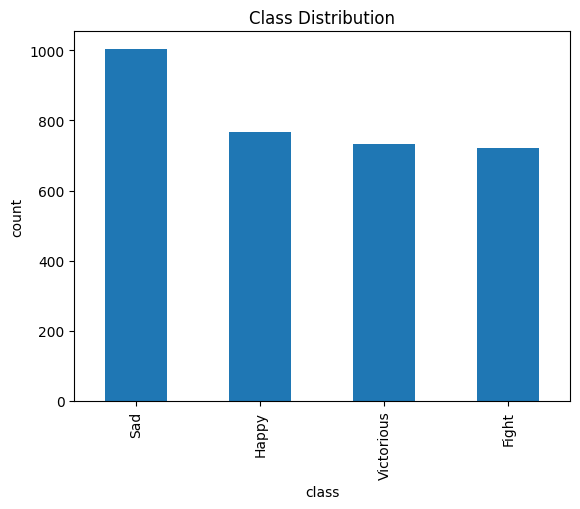

In [9]:
df['class'].value_counts().plot(kind='bar')

# Add labels and show the plot
plt.xlabel("class")
plt.ylabel("count")
plt.title("Class Distribution")
plt.show()